In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib notebook

**Import python packages**

In [95]:
import os
import shutil

from tqdm import tqdm

import numpy as np
import pandas as pd
import tensorflow as tf

import librosa
import librosa.display

import matplotlib
#matplotlib.use('Agg')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

from dataset import (
    get_dataset,
    get_dataframe,
    create_dataframe
)

In [96]:
#plt.style.use('ggplot')
MARKER = '.'
MARKERSIZE = 4
LINESTYLE ='-'
FONTSIZE = 12
FIGSIZE = (8, 4)

**Compute dataset**

Should be fast if dataset already memoized.

In [97]:
dataset = get_dataset(recompute=False)
df = get_dataframe()

123it [00:00, 587.75it/s]


In [134]:
df[df.recording == 637].drop(["sample_nb", "t0", "t1", "duration", "audio_path", "file"], axis=1).astype({
    "recording": str, "vocalization": str, "nest": str, "postnatalday": str
}).describe()

,vocalization,experiment,recording,nest,postnatalday
count,165,165,165,165,165
unique,2,1,1,1,1
top,2,N2EP01-637,637,2,1
freq,134,165,165,165,165


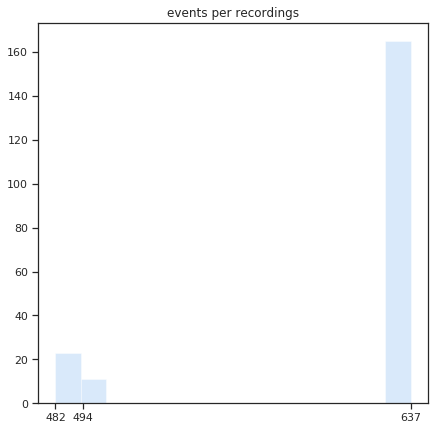

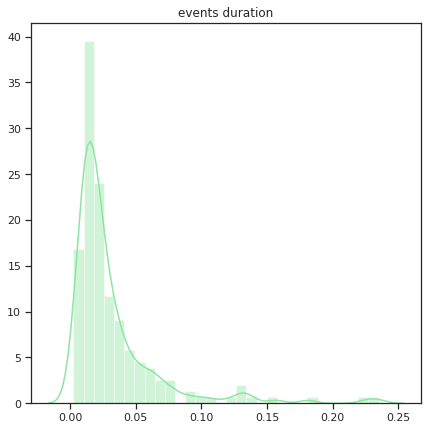

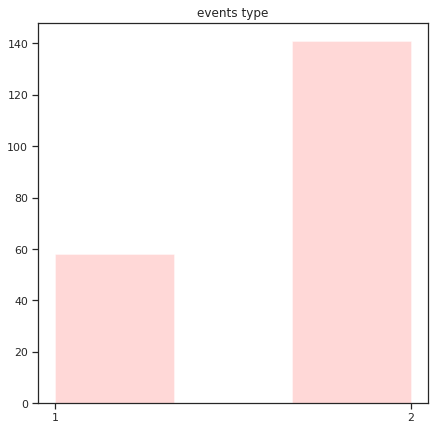

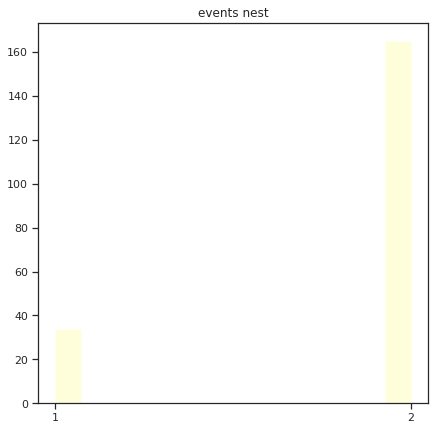

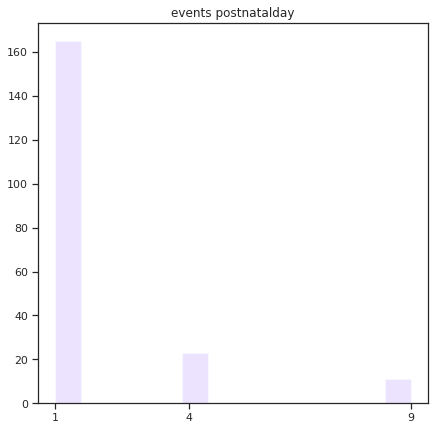

In [105]:

df = df.astype({"recording": int, "vocalization": int, "nest": int, "postnatalday": int})

f, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.distplot(df[['recording']],  kde=False, color="b", ax=ax)
plt.title('events per recordings')
ax.set_xticks([482, 494, 637])

f, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.distplot(df[['duration']], kde=True, color="g", ax=ax)
plt.title('events duration')

f, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.distplot(df[['vocalization']], kde=False, color="r", ax=ax)
plt.title('events type')
ax.set_xticks([1 , 2])

f, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.distplot(df[['nest']], kde=False, color="y", ax=ax)
plt.title('events nest')
ax.set_xticks([1 , 2])

f, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.distplot(df[['postnatalday']], kde=False, color="m", ax=ax)
plt.title('events postnatalday')
ax.set_xticks([1 , 4, 9])

#df.columns

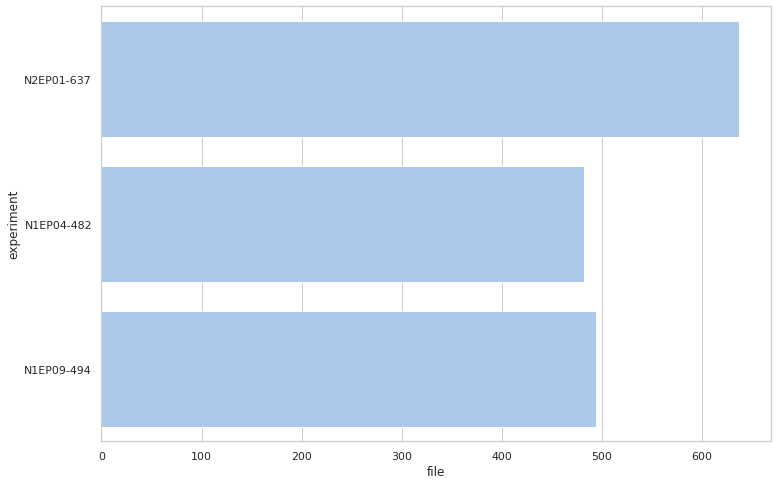

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="file", y="experiment", data=df,
            label="Total", color="b")



In [13]:
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY


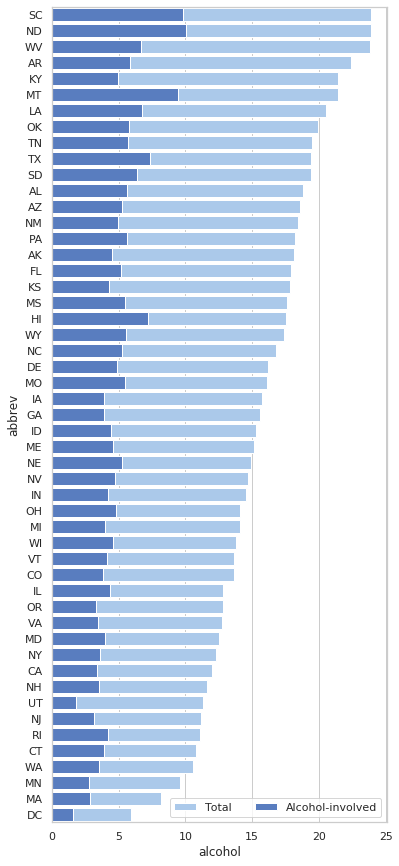

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)


#### Inspect samples in dataset

**Save plots**

In [ ]:
def get_path(sample, feature):
    return os.path.join(PLOTS_PATH,
                        feature,
                        str(sample['vocalization'].numpy()),
                        f"{sample['file']}-{sample['sample_nb']}.png")

**save stft**

In [ ]:
for sample in tqdm(iter(dataset)):
    
    fig = plt.figure(figsize=FIGSIZE)                         
    ax = librosa.display.specshow(
        librosa.power_to_db(sample['stft'].numpy(), ref=np.max),
        **STFTPLOTPARAMS
    )

    vocalization = sample['vocalization'].numpy()
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{VOCALIZATIONS[vocalization]} - power spectrogram')

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(FONTSIZE)

    plt.clim(vmin=-60, vmax=0)
    
    plt.savefig(get_path(sample, 'stft'), transparent=False)
    
    plt.close(fig)

**save mel spectrogram**

In [ ]:
for sample in tqdm(iter(dataset)):
    
    fig = plt.figure(figsize=FIGSIZE)
    ax = librosa.display.specshow(
            librosa.power_to_db(sample['mel'].numpy(), ref=np.max),
            **MELPLOTPARAMS
    )
    plt.colorbar(format='%+2.0f dB')
    vocalization = sample['vocalization'].numpy()
    plt.title(f'{VOCALIZATIONS[vocalization]} - power mel-frequency spectrogram')

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(FONTSIZE)

    plt.clim(vmin=-80, vmax=0)
    
    plt.savefig(get_path(sample, 'mel'), transparent=False)
    
    plt.close(fig)

**save mfcc**

In [ ]:
for sample in tqdm(iter(dataset)):
    fig = plt.figure(figsize=FIGSIZE)
    ax = librosa.display.specshow(
        sample['mfcc'].numpy(),
        **MFCCPLOTPARAMS
    )
    plt.colorbar()
    vocalization = sample['vocalization'].numpy()
    plt.title(f'{VOCALIZATIONS[vocalization]} - MFCC+$\Delta$+$\Delta^2$')

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(FONTSIZE)

    plt.clim(vmin=-250, vmax=0)
    
    plt.savefig(get_path(sample, 'mfcc'), transparent=False)
    
    plt.close(fig)